https://www.linkedin.com/pulse/extracting-your-fav-playlist-info-spotifys-api-samantha-jones/

https://towardsdatascience.com/reverse-engineering-spotify-wrapped-ai-using-python-452b58ad1a62

https://towardsdatascience.com/extracting-song-data-from-the-spotify-api-using-python-b1e79388d50

# Import and Settings
### Python - 3.9.10

In [53]:
import spotipy
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mpl
from spotipy.oauth2 import SpotifyClientCredentials

In [54]:
cid = 'client id'
secret = 'client secret'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)


In [55]:
# Tops Songs 2020
# playlist_link = "https://open.spotify.com/playlist/37i9dQZF1EM9DVbOg6CjfI?si=f57f3dbd0c7c4342"

# Tops Songs 2021
playlist_link = "https://open.spotify.com/playlist/2m7FyVPAKKwu3xfpn49miL?si=c4db6bb449f74d55"

# Tops Songs 2022
# playlist_link = "https://open.spotify.com/playlist/0rXAPXNnHgU3FUmBhKULXP?si=918768d5124a4a4c"


playlist_URI = playlist_link.split("/")[-1].split("?")[0]

In [56]:
playlist_features_list = [
    "track_id",
    "track_name",
    "artist",
    "album",
    "tempo",
    "duration_ms",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "instrumentalness",
    "liveness",
    "valence",
    "time_signature"
    ]

df = pd.DataFrame(columns = playlist_features_list)
    
playlist = sp.user_playlist_tracks("spotify", playlist_URI)["items"]
for track in playlist:
    # Create empty dict
    playlist_features = {}
    # Get metadata
    playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
    playlist_features["album"] = track["track"]["album"]["name"]
    playlist_features["track_name"] = track["track"]["name"]
    playlist_features["track_id"] = track["track"]["id"]
    
    # Get audio features
    audio_features = sp.audio_features(playlist_features["track_id"])[0]
    for feature in playlist_features_list[4:]:
        playlist_features[feature] = audio_features[feature]
    
    # Concat the dfs
    track_df = pd.DataFrame(playlist_features, index = [0])
    df = pd.concat([df, track_df], ignore_index = True)

# return playlist_df


# Column Info & Conversions

In [57]:
df.head()

# df.describe()

# df.isna().any()

# df.dtypes

,track_id,track_name,artist,album,tempo,duration_ms,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,time_signature
0,1c5CllrZr45UBhWpIqM332,Funny Thing,Thundercat,It Is What It Is,140.023,116630,0.586,0.893,7,-8.772,1,0.439,0.642,0.212,0.65,3
1,31qCy5ZaophVA81wtlwLc4,Anyone,Justin Bieber,Anyone,115.884,190779,0.686,0.538,2,-8.026,1,0.0345,0.000003,0.113,0.584,4
2,1GkHyypTFkUf0QQKwYoXH4,You (with Marshmello & Vance Joy),benny blanco,You (with Marshmello & Vance Joy),103.116,169632,0.668,0.563,11,-6.433,1,0.0522,0,0.119,0.305,4
3,4d7ifHr1zrli3fOi9aIHax,Misnomer,The Brook & The Bluff,Yard Sale (Side A),116.361,223240,0.471,0.492,10,-9.043,1,0.0468,0.000668,0.137,0.38,4
4,5th1bFGGaXLM7wDBJpcF06,Booster Seat,Spacey Jane,Sunlight,111.961,268880,0.629,0.551,11,-5.402,1,0.0263,0.000001,0.108,0.699,4


In [58]:
# Converting and Renaming
df = df.astype({"tempo": float,
                "duration_ms": float,
                "danceability": float,
                "energy": float,
                "key": float,
                "loudness": float,
                "mode": int,
                "speechiness": float,
                "instrumentalness": float,
                "liveness": float,
                "valence": float,
                "time_signature": int
                # "energy": float,
                 })

                 
df.rename(columns={
#     'artist':'Artist',
#     'album':'Album',
#     'track_name':'Track', 
#     'track_id':'ID', 
#     'danceability':'Danceability', 
#     'energy':'Energy', 
#     'key':'Key', 
#     'loudness':'Loudness', 
#     'mode':'Mode', 
#     'speechiness':'Speechiness', 
#     'instrumentalness':'Instrumentalness', 
#     'liveness':'Liveness', 
#     'valence':'Valence', 
#     'tempo':'Tempo', 
    'duration_ms':'duration_m'
#     'time_signature':'Time_Signature'
    }, inplace=True)

df['duration_m'] = (df['duration_m'] / 1000 ) /60

df.head()

,track_id,track_name,artist,album,tempo,duration_m,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,time_signature
0,1c5CllrZr45UBhWpIqM332,Funny Thing,Thundercat,It Is What It Is,140.023,1.943833,0.586,0.893,7.0,-8.772,1,0.4390,0.642000,0.212,0.650,3
1,31qCy5ZaophVA81wtlwLc4,Anyone,Justin Bieber,Anyone,115.884,3.179650,0.686,0.538,2.0,-8.026,1,0.0345,0.000003,0.113,0.584,4
2,1GkHyypTFkUf0QQKwYoXH4,You (with Marshmello & Vance Joy),benny blanco,You (with Marshmello & Vance Joy),103.116,2.827200,0.668,0.563,11.0,-6.433,1,0.0522,0.000000,0.119,0.305,4
3,4d7ifHr1zrli3fOi9aIHax,Misnomer,The Brook & The Bluff,Yard Sale (Side A),116.361,3.720667,0.471,0.492,10.0,-9.043,1,0.0468,0.000668,0.137,0.380,4
4,5th1bFGGaXLM7wDBJpcF06,Booster Seat,Spacey Jane,Sunlight,111.961,4.481333,0.629,0.551,11.0,-5.402,1,0.0263,0.000001,0.108,0.699,4


# Specific Metrics

In [59]:

# Max / Min Tempo
df[df['tempo']==df['tempo'].min()][['track_name', 'tempo','duration_m']]

# Longest Song
# df[df['duration_m']==df['duration_m'].max()]['track_name']


# Temp
df[df['speechiness']==df['speechiness'].max()][['track_name', 'artist','speechiness']]
# df[df['speechiness']==df['speechiness'].min()][['track_name', 'artist','speechiness']]


,track_name,artist,speechiness
0,Funny Thing,Thundercat,0.439


# Visualisations

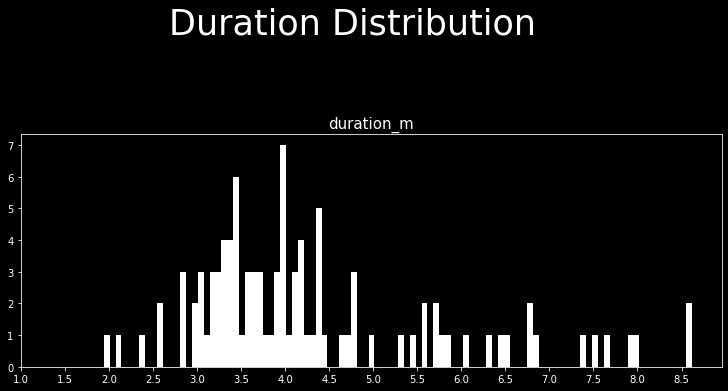

In [65]:
dur_hist = df[['duration_m']]

duration_max = int(df[['duration_m']].max() + 0.5)
duration_min = int(df[['duration_m']].min())

fig = mpl.figure(figsize=(15, 25))

mpl.suptitle('Duration Distribution',
                horizontalalignment="right",
                fontstyle = "normal", 
                fontsize = 35, 
                fontfamily = "sans-serif")

for i in range(dur_hist.shape[1]):
    mpl.subplot(6, 3, i + 1)
    f = mpl.gca()
    f.set_title(dur_hist.columns.values[i],fontsize='15')

    vals = np.size(dur_hist.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
        
    mpl.hist(dur_hist.iloc[:, i], 
                bins=vals, 
                color = 'white')

# X axis tick rate
mpl.xticks(np.arange(duration_min, duration_max, 0.5))
mpl.style.use('dark_background') # Because dark mode everything
mpl.tight_layout(rect=[0, 0.05, 2, 0.95])

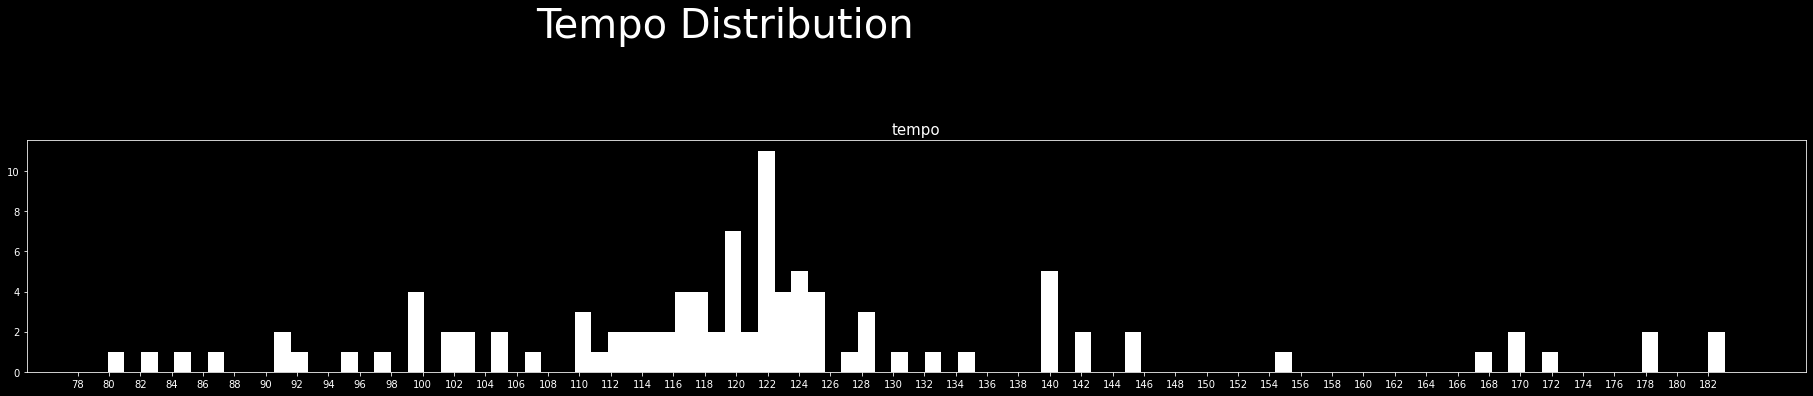

In [66]:
tempo_hist = df[['tempo']]

tempo_max = int(df[['tempo']].max() + 1)
tempo_min = int(df[['tempo']].min() - 1)

fig = mpl.figure(figsize=(15, 25))

mpl.suptitle('Tempo Distribution',
                horizontalalignment="left",
                fontstyle = "normal", 
                fontsize = 40, 
                fontfamily = "sans-serif")

for i in range(tempo_hist.shape[1]):
    mpl.subplot(6, 3, i + 1)
    f = mpl.gca()
    f.set_title(tempo_hist.columns.values[i],fontsize='15')

    vals = np.size(tempo_hist.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
        
    mpl.hist(tempo_hist.iloc[:, i], 
                bins=vals, 
                color = 'white')

# X axis tick rate
mpl.xticks(np.arange(tempo_min, tempo_max, 2))
mpl.style.use('dark_background') # Because dark mode everything
mpl.tight_layout(rect=[0, 0.05, 5, 0.95])

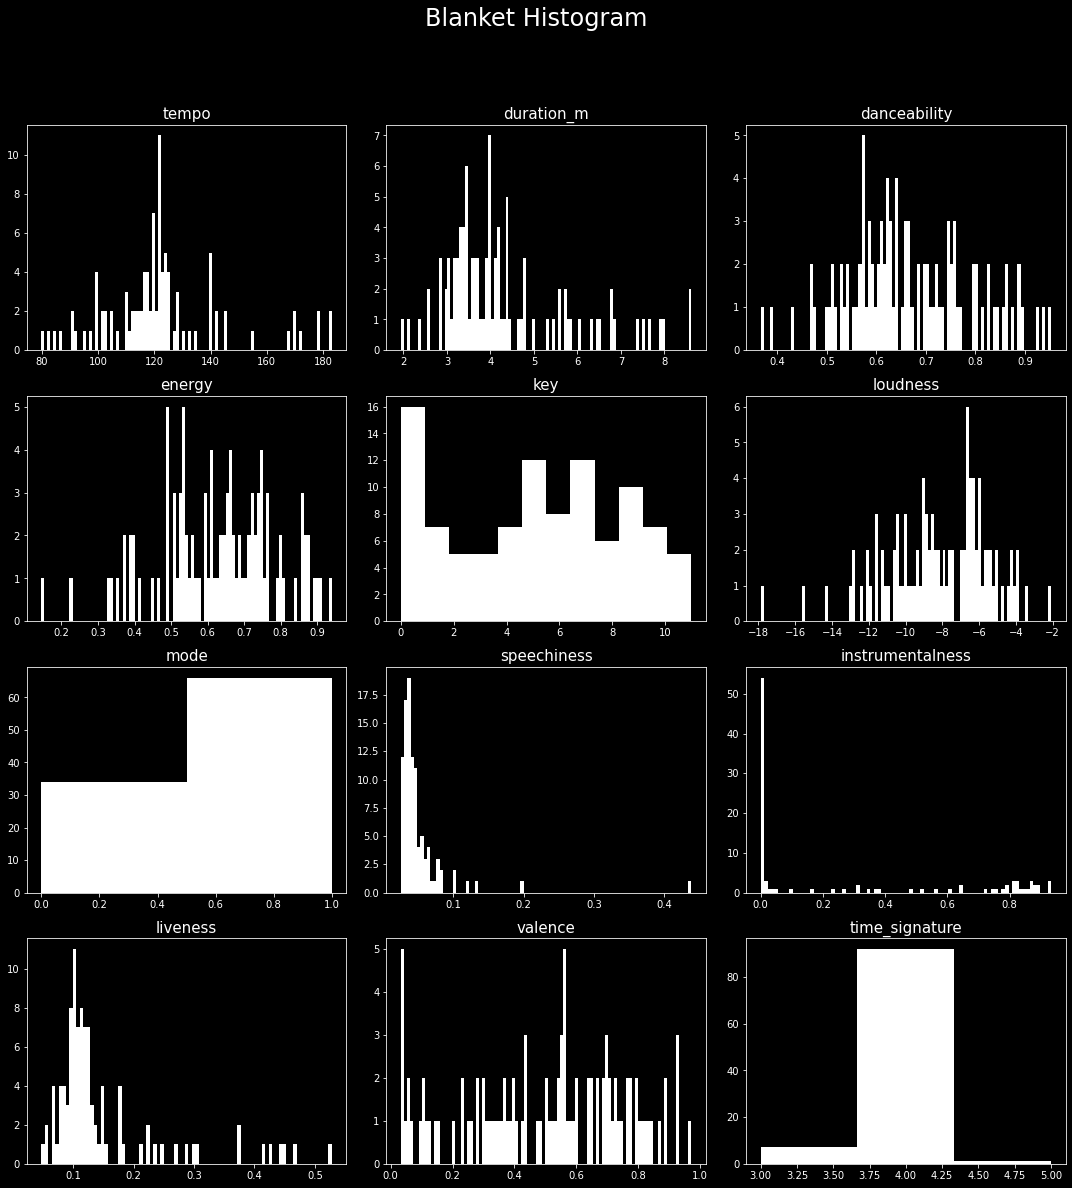

In [67]:
ds2 = df[["tempo",
            "duration_m",
            "danceability",
            "energy",
            "key",
            "loudness",
            "mode",
            "speechiness",
            "instrumentalness",
            "liveness",
            "valence",
            "time_signature"
            ]]

# ds2 = df

fig = mpl.figure(figsize=(15, 25))

mpl.suptitle('Blanket Histogram',
                horizontalalignment="center",
                fontstyle = "normal", 
                fontsize = 24, 
                fontfamily = "sans-serif")

for i in range(ds2.shape[1]):
    mpl.subplot(6, 3, i + 1)
    f = mpl.gca()
    f.set_title(ds2.columns.values[i],fontsize='15')

    vals = np.size(ds2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
        
    mpl.hist(ds2.iloc[:, i], 
                bins=vals, 
                color = 'white')

mpl.style.use('dark_background') # Because dark mode everything
mpl.tight_layout(rect=[0, 0.03, 1, 0.95])

Most Positive Correlations: 
 speechiness         0.139203
mode                0.138590
instrumentalness    0.118969
energy              0.076213
dtype: float64

Most Negative Correlations: 
 loudness         -0.003719
duration_m       -0.028758
key              -0.035399
liveness         -0.065908
valence          -0.104250
time_signature   -0.200784
danceability     -0.228610
dtype: float64


Text(0.5, 1.0, 'Tempo Correlation \n')

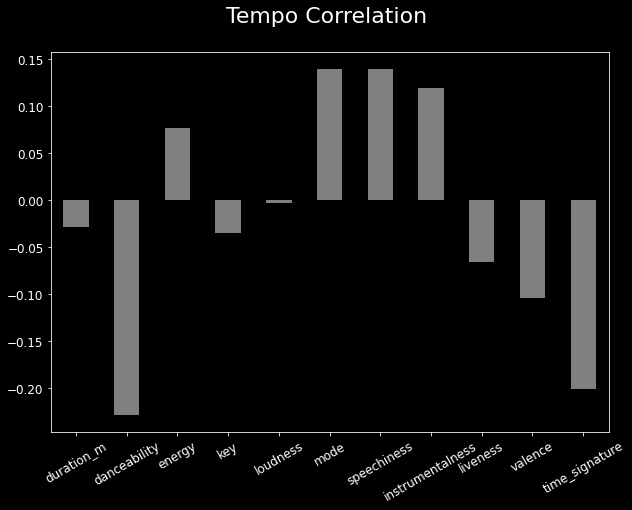

In [68]:
ds2 = df[["duration_m",
            "danceability",
            "energy",
            "key",
            "loudness",
            "mode",
            "speechiness",
            "instrumentalness",
            "liveness",
            "valence",
            "time_signature"
            ]]

correlations = ds2.corrwith(df.tempo)
correlations = correlations[correlations!=1]

positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations <0].sort_values(ascending = False)

# Printing values
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

correlations.plot.bar(figsize = (10, 7), 
                        fontsize = 12, 
                        color = 'grey',
                        rot = 30)

mpl.title('Tempo Correlation \n',
            horizontalalignment="center", 
            fontstyle = "normal", 
            fontsize = "22", 
            fontfamily = "sans-serif")

Most Positive Correlations: 
 danceability      0.412478
loudness          0.292862
time_signature    0.198833
mode              0.115061
speechiness       0.105465
key               0.028186
dtype: float64

Most Negative Correlations: 
 liveness           -0.022333
energy             -0.054009
tempo              -0.104250
duration_m         -0.367385
instrumentalness   -0.507482
dtype: float64


Text(0.5, 1.0, 'Valence (Positivity) Correlation \n')

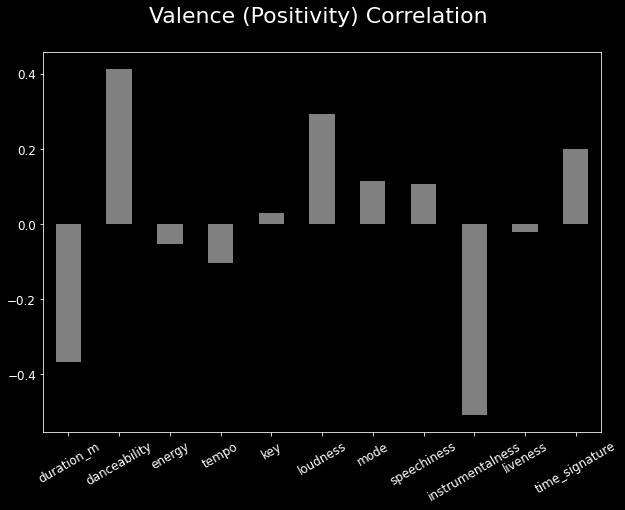

In [69]:
ds2 = df[["duration_m",
            "danceability",
            "energy",
            "tempo",
            "key",
            "loudness",
            "mode",
            "speechiness",
            "instrumentalness",
            "liveness",
            # "valence",
            "time_signature"
            ]]

correlations = ds2.corrwith(df.valence)
correlations = correlations[correlations!=1]

positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations <0].sort_values(ascending = False)

# Printing values
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

correlations.plot.bar(figsize = (10, 7), 
                        fontsize = 12, 
                        color = 'grey',
                        rot = 30
                        )

mpl.title('Valence (Positivity) Correlation \n',
            horizontalalignment="center", 
            fontstyle = "normal", 
            fontsize = "22", 
            fontfamily = "sans-serif")